# Assignment 1

1. **Thiết lập mô hình toán học tổng quát của các xung:**
    
    + Xung vuông (square wave)
    
    + Xung tam giác (triangle wave)
    
    + Xung răng cưa (sawtooth wave)
    
    + Xung chuỗi (pules train)
    
    Bằng mô hình chuỗi Fourier với tần số f = 1000*sin(2*pi/49*N) N: Số thứ tự của sinh viên 
    
2. **Viết code để thực hiện vẽ các xung đã thiết lập mô hình toán học:**
    
    + khảo sát với 1000 sóng?
    
    + khảo sát với góc pha phi=2*pi/N?
    
    + Tìm biên độ của xung?
    
    + Vẽ thống kê biên độ của hàm tổng hợp (các xung) theo tổng số sóng thành phần chạy từ 100 đến 1000?

## Mô hình toán học

1. **Xung vuông (Square Wave):**
- General formula:
    
    $$
    x(t) = \frac{4 V}{\pi} \sum_{n=1,3,5...}^{\infty} \frac{1}{n} \cos(n \omega t + \phi_n) \\=  \frac{4V}{\pi} \sum_{m=0}^{\infty} \frac{1}{2m + 1} \cos((2m+1) \omega t + \phi_{2m+1})
    $$
    
    where ($\omega = 2\pi f, V = amplitude, \phi_n = n \phi_0$)

2. **Xung tam giác (Triangle Wave):**
    
    $$
    x(t) = \frac{8}{\pi^2} \sum_{n=1,3,5...}^{\infty} \frac{(-1)^{\frac{n-1}{2}}}{n^2} \sin(n \omega t)x(t)
    $$

3. **Xung răng cưa (Sawtooth wave)**:
   $$  f(t) = \frac{2}{\pi} \sum_{k=1}^{\infty} \frac{(-1)^{k+1}\sin(2\pi kft)}{k} = \frac{2}{\pi} \sum_{k=1}^{\infty} \frac{(-1)^{k+1}\sin(1.2\pi kt)}{k} $$

4. **Xung chuỗi (Pulse train)**:
$$
\text{pulse\_train}(t, N, \phi, \tau, T) = \sum_{n=-N}^{N} \sin(2 \pi n f t + \phi) \cdot \text{sinc}(n \tau f)
$$

Params:
- $t$: Time variable.
- $N$: Number of harmonics.
- $\phi$: Phase shift.
- $\tau$: Pulse width.
- $T$: Period of the pulse train.
- $f$: Frequency of the pulse train (not provided in your code but necessary for the formula).


## Code practice

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## CONSTANTS
N = 27 # id

f = abs(1000 * np.sin( (2 * np.pi / 49) * N)) # Frequency
phi = 2 * np.pi / N # Phase
A = 1 # amplitude


num_components = 1000  # 1000 component waves
time = np.linspace(0, 3 * 1/f, 1000)  # 3 period

print(
    f'\n Amplitude: {A}',
    f'\n Frequency: {f}',
    f'\n Init Phase: {phi}',
)


 Amplitude: 1 
 Frequency: 315.1082180236202 
 Init Phase: 0.23271056693257727


### 1. Square wave

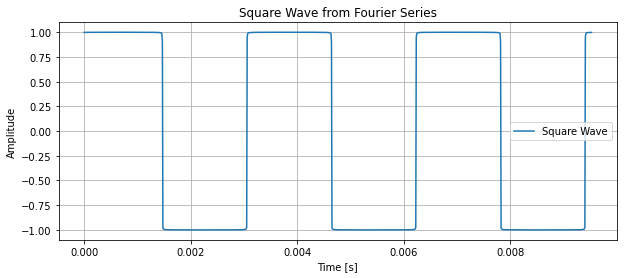


Biên độ xung với 1000 thành phần: 1.0003183086253677


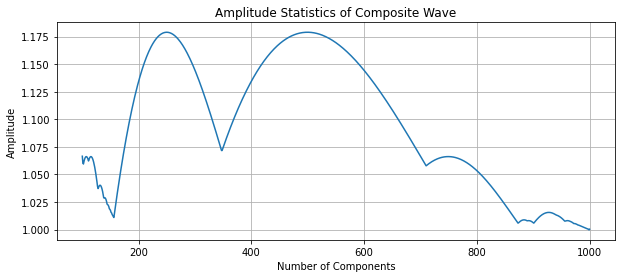

In [2]:
def square_wave(time, f, phi, num_components):
    # Initialize the square wave signal
    square_wave = np.zeros_like(time)

    # Calculate the Fourier series approximation
    for n in range(1, 2*num_components, 2):
        square_wave += (4*A/np.pi) * (1/n) * np.sin((2 * np.pi * f) * n * time + phi * n)

    return square_wave

square_wave1000 = square_wave(time, f, phi, num_components)

# Plot
plt.figure(figsize=(10, 4))
plt.plot(time, square_wave1000, label='Square Wave')
plt.title('Square Wave from Fourier Series')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()


#####
def find_amplitude(wave):
    return np.max(wave)

print(f'\nBiên độ xung với 1000 thành phần: {find_amplitude(square_wave1000)}')


# Vẽ thống kê biên độ của hàm tổng hợp (các xung) theo tổng số
# sóng thành phần chạy từ 100 đến 1000?
amplitudes = [find_amplitude(square_wave(time, f, phi, n)) for n in range(100, 1001, 1)]
components = list(range(100, 1001, 1))

plt.figure(figsize=(10, 4))
plt.plot(components, amplitudes)
plt.title('Amplitude Statistics of Composite Wave')
plt.xlabel('Number of Components')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

### 2. Triangle wave

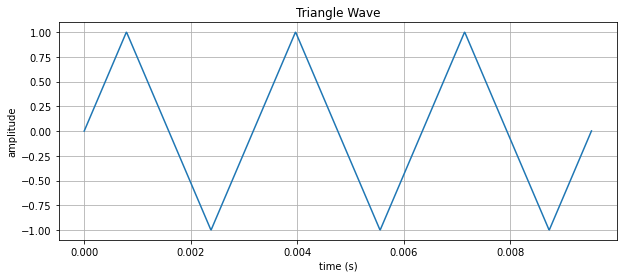

In [3]:
def triangle_wave(time, f, phi, num_components):
    return (8 / np.pi**2) * sum(
                                (-1)**((k-1)//2) *
                                np.sin(2 * np.pi * k * f * time + time * phi) / k**2 
                                for k in range(1, num_components+1, 2)
                                )

triangle1000 = triangle_wave(time, f, phi, num_components)
# Vẽ xung tam giác
plt.figure(figsize=(10, 4))
plt.plot(time, triangle1000)
plt.title('Triangle Wave')
plt.xlabel('time (s)')
plt.ylabel('amplitude')
plt.grid(True)
plt.show()

Biên độ của xung tam giác: 0.9969462151285363


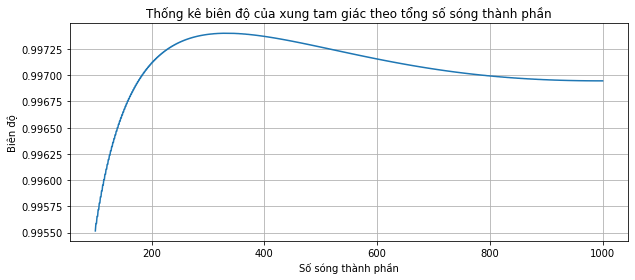

In [4]:
# Tìm biên độ của xung
amplitude = np.max(triangle1000)
print(f'Biên độ của xung tam giác: {amplitude}')

# Vẽ thống kê biên độ theo tổng số sóng thành phần
amplitudes = [np.max(triangle_wave(time, f, phi, num_components=n)) 
                    for n in range(100, 1001)]

rang = range(100, 1001)
plt.figure(figsize=(10, 4))
plt.plot(rang, amplitudes)
plt.title('Thống kê biên độ của xung tam giác theo tổng số sóng thành phần')
plt.xlabel('Số sóng thành phần')
plt.ylabel('Biên độ')
plt.grid(True)
plt.show()

### 3. Sawtooth wave

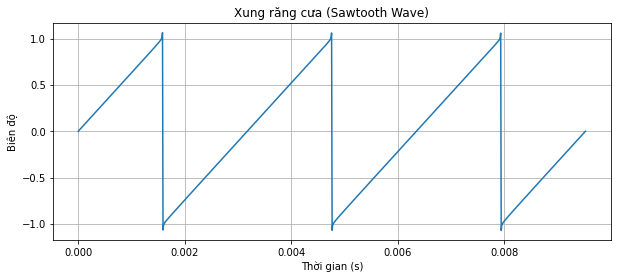

In [5]:
# Hàm tạo xung răng cưa dựa trên chuỗi Fourier
def sawtooth_wave(time, f, phi, num_components=1000):
    return (2 / np.pi) * sum(
                            (-1)**(k+1) *
                            np.sin(2 * np.pi * k * f * time + phi * time) / k
                            for k in range(1, num_components+1)
                            )

# Khởi tạo mảng thời gian
sawtooth1000 = sawtooth_wave(time, f, phi)

# Vẽ xung răng cưa
plt.figure(figsize=(10, 4))
plt.plot(time, sawtooth1000)
plt.title('Xung răng cưa (Sawtooth Wave)')
plt.xlabel('Thời gian (s)')
plt.ylabel('Biên độ')
plt.grid(True)
plt.show()

Biên độ của xung răng cưa: 1.062081795202368


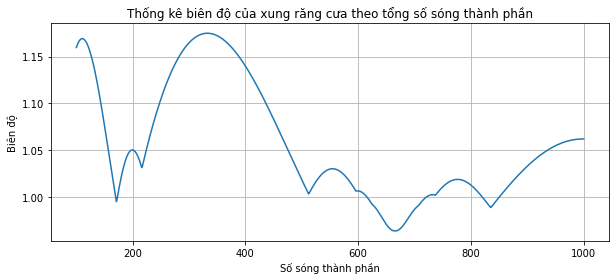

In [6]:
# Tìm biên độ của xung
amplitude = np.max(sawtooth1000)
print(f'Biên độ của xung răng cưa: {amplitude}')

# Vẽ thống kê biên độ theo tổng số sóng thành phần
amplitudes = [np.max(sawtooth_wave(time, f, phi, num_components=n)) for n in range(100, 1001)]
plt.figure(figsize=(10, 4))
plt.plot(range(100, 1001), amplitudes)
plt.title('Thống kê biên độ của xung răng cưa theo tổng số sóng thành phần')
plt.xlabel('Số sóng thành phần')
plt.ylabel('Biên độ')
plt.grid(True)
plt.show()

### 4. Pulse train

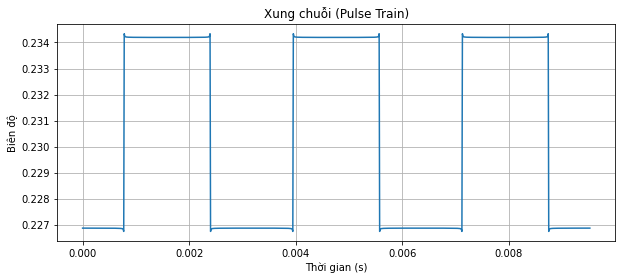

In [7]:
def pulse_train(t, phi, tau, f, N):
    return sum(np.sin(2 * np.pi * n * f * t + phi) *
                np.sinc(n * tau * f) for n in range(-N, N+1))

# Độ rộng xung khoảng cách giữa các xung
phi = 2 * np.pi / N
tau = 0.1  # Độ rộng xung
T = 0.5  # Khoảng cách giữa các xung

pulse_train1000 =  pulse_train(time, phi, tau, f, N=num_components)
# Vẽ xung chuỗi
plt.figure(figsize=(10, 4))
plt.plot(time, pulse_train1000)
plt.title('Xung chuỗi (Pulse Train)')
plt.xlabel('Thời gian (s)')
plt.ylabel('Biên độ')
plt.grid(True)
plt.show()


Biên độ của xung chuỗi: 0.23433428632337713


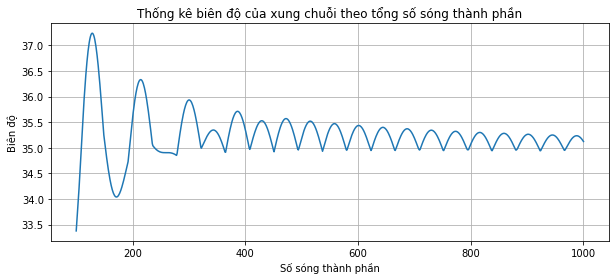

In [8]:
# Tìm biên độ của xung
amplitude = np.max(pulse_train1000)
print(f'Biên độ của xung chuỗi: {amplitude}')

# Vẽ thống kê biên độ theo tổng số sóng thành phần
amplitudes = [np.max(pulse_train(time, f, phi, tau, N=n)) for n in range(100, 1001)]
plt.figure(figsize=(10, 4))
plt.plot(range(100, 1001), amplitudes)
plt.title('Thống kê biên độ của xung chuỗi theo tổng số sóng thành phần')
plt.xlabel('Số sóng thành phần')
plt.ylabel('Biên độ')
plt.grid(True)
plt.show()

# Assignment 2